# 🛒 TP 3 : Algorithme Apriori (Règles d'Association)

**Contexte :**
Nous disposons maintenant d'un dataset "propre" et discrétisé (transformé en catégories). Nous voulons découvrir des relations entre les caractéristiques chimiques du vin et sa qualité.

**Algorithme :** Apriori
C'est un algorithme classique qui fonctionne en deux temps :
1.  **Frequent Itemsets :** Trouver les combinaisons d'attributs qui apparaissent souvent ensemble (Support).
2.  **Association Rules :** Déduire des règles logiques "Si X alors Y" (Confiance & Lift).

**Métriques clés :**
* **Support :** Fréquence d'apparition (ex: 10% des vins ont cette caractéristique).
* **Confidence :** Probabilité que Y soit vrai si X est vrai.
* **Lift :** La force du lien. Si Lift > 1, il y a une corrélation positive forte.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Configuration esthétique
sns.set_style("whitegrid")

print("Librairies mlxtend chargées.")

Librairies mlxtend chargées.


In [4]:
# Chargement du fichier préparé au TP 2
try:
    df = pd.read_csv('../wine+quality/wine_discretized.csv')
    print("Dataset discrétisé chargé avec succès !")
    print(f"Dimensions : {df.shape}")
except FileNotFoundError:
    print("❌ Erreur : Fichier 'wine_discretized.csv' introuvable dans '../Datasets/'. Avez-vous bien fait le TP 2 ?")

df.head()

Dataset discrétisé chargé avec succès !
Dimensions : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,fixed acidity_Faible,volatile acidity_Fort,citric acid_Faible,residual sugar_Faible,chlorides_Moyen,free sulfur dioxide_Moyen,total sulfur dioxide_Moyen,density_Fort,pH_Fort,sulphates_Faible,alcohol_Faible,Qualité_Basse
1,fixed acidity_Moyen,volatile acidity_Fort,citric acid_Faible,residual sugar_Fort,chlorides_Fort,free sulfur dioxide_Fort,total sulfur dioxide_Fort,density_Moyen,pH_Faible,sulphates_Moyen,alcohol_Moyen,Qualité_Basse
2,fixed acidity_Moyen,volatile acidity_Fort,citric acid_Faible,residual sugar_Moyen,chlorides_Fort,free sulfur dioxide_Moyen,total sulfur dioxide_Fort,density_Moyen,pH_Moyen,sulphates_Moyen,alcohol_Moyen,Qualité_Basse
3,fixed acidity_Fort,volatile acidity_Faible,citric acid_Fort,residual sugar_Faible,chlorides_Moyen,free sulfur dioxide_Moyen,total sulfur dioxide_Fort,density_Fort,pH_Faible,sulphates_Moyen,alcohol_Moyen,Qualité_Moyenne
4,fixed acidity_Faible,volatile acidity_Fort,citric acid_Faible,residual sugar_Faible,chlorides_Moyen,free sulfur dioxide_Moyen,total sulfur dioxide_Moyen,density_Fort,pH_Fort,sulphates_Faible,alcohol_Faible,Qualité_Basse


## 1. Préparation pour Apriori (One-Hot Encoding)

L'algorithme Apriori ne comprend pas le texte (ex: "Alcool_Fort"). Il ne comprend que des **booléens** (Vrai/Faux ou 1/0).
Nous devons transformer notre tableau : chaque valeur unique devient une colonne.

Exemple :
* Colonne avant : `Alcool` = ["Fort", "Faible"]
* Colonnes après : `Alcool_Fort` (0 ou 1) et `Alcool_Faible` (0 ou 1).

In [5]:
# Transformation en variables binaires (Dummy variables)
# C'est une étape OBLIGATOIRE pour mlxtend
df_encoded = pd.get_dummies(df)

# Pour les versions récentes de mlxtend, il est préférable d'utiliser des booléens (True/False)
df_encoded = df_encoded.astype(bool)

print("Transformation terminée.")
print(f"Nouvelles dimensions : {df_encoded.shape} (Beaucoup plus de colonnes !)")
df_encoded.head()

Transformation terminée.
Nouvelles dimensions : (1599, 36) (Beaucoup plus de colonnes !)


,fixed acidity_fixed acidity_Faible,fixed acidity_fixed acidity_Fort,fixed acidity_fixed acidity_Moyen,volatile acidity_volatile acidity_Faible,volatile acidity_volatile acidity_Fort,volatile acidity_volatile acidity_Moyen,citric acid_citric acid_Faible,citric acid_citric acid_Fort,citric acid_citric acid_Moyen,residual sugar_residual sugar_Faible,...,pH_pH_Moyen,sulphates_sulphates_Faible,sulphates_sulphates_Fort,sulphates_sulphates_Moyen,alcohol_alcohol_Faible,alcohol_alcohol_Fort,alcohol_alcohol_Moyen,quality_cat_Qualité_Basse,quality_cat_Qualité_Haute,quality_cat_Qualité_Moyenne
0,True,False,False,False,True,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
1,False,False,True,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,True,False,False
2,False,False,True,False,True,False,True,False,False,False,...,True,False,False,True,False,False,True,True,False,False
3,False,True,False,True,False,False,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
4,True,False,False,False,True,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


## 2. Génération des "Frequent Itemsets"

Nous allons chercher les groupes d'éléments qui apparaissent ensemble dans au moins **5%** (`min_support=0.05`) des vins.
*Note : Si on met un support trop bas, le calcul explose. Si trop haut, on ne trouve rien.*

In [6]:
# Application de l'algorithme Apriori
# min_support = 0.05 signifie qu'on ne garde que les combinaisons présentes dans au moins 5% du dataset
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Tri par support décroissant (les plus fréquents en premier)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print(f"Nombre d'itemsets fréquents trouvés : {len(frequent_itemsets)}")
print("-" * 30)
print("Top 10 des combinaisons les plus fréquentes :")
print(frequent_itemsets.head(10))

Nombre d'itemsets fréquents trouvés : 2188
------------------------------
Top 10 des combinaisons les plus fréquentes :
     support                                          itemsets
33  0.465291                       (quality_cat_Qualité_Basse)
35  0.398999                     (quality_cat_Qualité_Moyenne)
9   0.387742            (residual sugar_residual sugar_Faible)
15  0.378361  (free sulfur dioxide_free sulfur dioxide_Faible)
0   0.358974              (fixed acidity_fixed acidity_Faible)
12  0.357098                      (chlorides_chlorides_Faible)
3   0.347092        (volatile acidity_volatile acidity_Faible)
30  0.345216                          (alcohol_alcohol_Faible)
24  0.343965                                    (pH_pH_Faible)
23  0.340838                           (density_density_Moyen)


## 3. Génération des Règles d'Association

Maintenant que nous avons les groupes fréquents, nous allons créer des règles du type :
> **Si** (Antécédent) **Alors** (Conséquent)

Nous filtrons pour garder uniquement les règles "fortes" :
* **Metric = "lift"** : Nous voulons des liens significatifs.
* **Threshold = 1.1** : Nous voulons un Lift > 1.1 (corrélation positive).

In [7]:
# Génération des règles
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

# Tri par 'lift' décroissant (les règles les plus intéressantes en premier)
rules = rules.sort_values(by='lift', ascending=False)

# Affichage des colonnes clés
cols_display = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
print(f"Nombre de règles trouvées : {len(rules)}")
rules[cols_display].head()

Nombre de règles trouvées : 10974


,antecedents,consequents,support,confidence,lift
8891,"(fixed acidity_fixed acidity_Fort, citric acid...","(pH_pH_Faible, density_density_Fort, total sul...",0.053158,0.414634,6.978947
8910,"(pH_pH_Faible, density_density_Fort, total sul...","(fixed acidity_fixed acidity_Fort, citric acid...",0.053158,0.894737,6.978947
7463,"(volatile acidity_volatile acidity_Faible, fix...","(pH_pH_Faible, citric acid_citric acid_Fort, t...",0.055660,0.618056,6.459286
7470,"(pH_pH_Faible, citric acid_citric acid_Fort, t...","(volatile acidity_volatile acidity_Faible, fix...",0.055660,0.581699,6.459286
7458,"(fixed acidity_fixed acidity_Fort, citric acid...","(volatile acidity_volatile acidity_Faible, pH_...",0.055660,0.483696,6.391978


## 4. Analyse Ciblée : Qu'est-ce qui fait un vin de Haute Qualité ?

C'est ici que l'analyse prend de la valeur. Nous allons filtrer les règles pour ne voir que celles qui aboutissent à **`quality_cat_Qualité_Haute`**.

In [8]:
# On cherche les règles où le CONSÉQUENT contient "Qualité_Haute"
# Note : les antecedents/consequents sont des objets 'frozenset', on doit itérer pour chercher dedans

target = 'quality_cat_Qualité_Haute'

# Filtrage
high_quality_rules = rules[rules['consequents'].apply(lambda x: target in str(x))]

print(f"Règles menant à une Qualité Haute : {len(high_quality_rules)}")

if not high_quality_rules.empty:
    # On affiche les règles avec une confiance raisonnable (> 40% par exemple)
    best_rules = high_quality_rules[high_quality_rules['confidence'] > 0.4]
    print("\nTop Règles pour prédire un vin de haute qualité :")
    print(best_rules[cols_display].head(10))
else:
    print("Aucune règle forte trouvée directement pour la qualité haute avec ces paramètres.")

Règles menant à une Qualité Haute : 76

Top Règles pour prédire un vin de haute qualité :
                                             antecedents  \
10796  (volatile acidity_volatile acidity_Faible, alc...   
3316    (alcohol_alcohol_Fort, sulphates_sulphates_Fort)   
2845   (volatile acidity_volatile acidity_Faible, alc...   
5192   (alcohol_alcohol_Fort, citric acid_citric acid...   
9147   (volatile acidity_volatile acidity_Faible, den...   

                       consequents   support  confidence      lift  
10796  (quality_cat_Qualité_Haute)  0.050031    0.481928  3.551163  
3316   (quality_cat_Qualité_Haute)  0.067542    0.457627  3.372100  
2845   (quality_cat_Qualité_Haute)  0.070044    0.446215  3.288009  
5192   (quality_cat_Qualité_Haute)  0.061288    0.417021  3.072889  
9147   (quality_cat_Qualité_Haute)  0.052533    0.409756  3.019355  


## 5. Visualisation des Règles

Un graphique nuage de points (Scatter plot) Support vs Confiance, coloré par le Lift.

/home/dongmo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/dongmo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/dongmo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


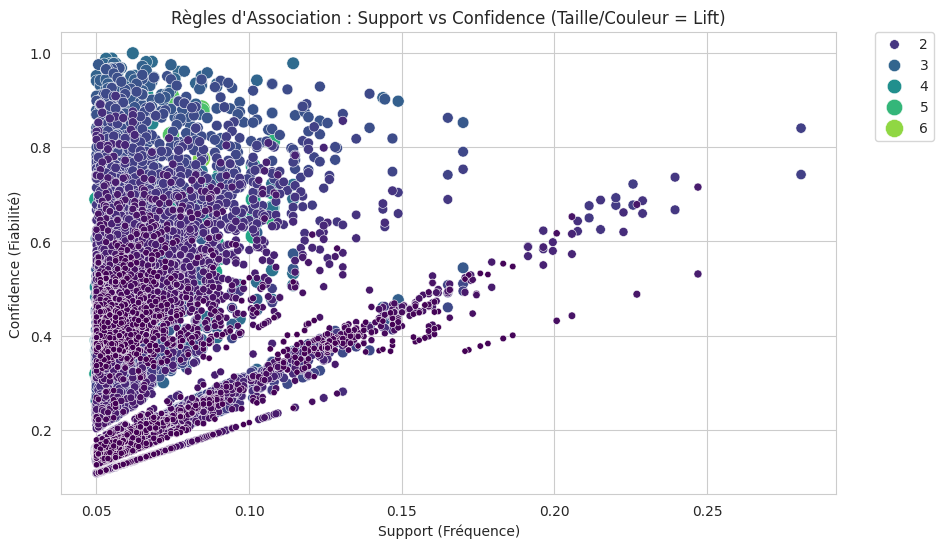

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette="viridis", sizes=(20, 200))
plt.title('Règles d\'Association : Support vs Confidence (Taille/Couleur = Lift)')
plt.xlabel('Support (Fréquence)')
plt.ylabel('Confidence (Fiabilité)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 📉 TP 3 (Suite) : Algorithme Min-Apriori (Étude de Sensibilité)
**Contexte** : L'algorithme Apriori repose entièrement sur une propriété appelée "Anti-monotonie" :

Si un ensemble d'articles est fréquent (dépasse le Min-Support), alors tous ses sous-ensembles sont fréquents. Inversement, si un ensemble est sous le Min-Support, on l'élimine immédiatement (élagage).

**Objectif de cette partie** : Ne pas se contenter de lancer l'algo, mais analyser comment la variation du Min-Support (le "Min" de Min-Apriori) change drastiquement le nombre de règles découvertes dans le dataset Wine

## 1. Importation et Chargement

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time # Pour mesurer la vitesse d'exécution

sns.set_style("whitegrid")

# Chargement du dataset préparé (Discrétisé)
try:
    df = pd.read_csv('../wine+quality/wine_discretized.csv')
    print("Dataset chargé.")
except FileNotFoundError:
    print("Erreur : Chargez d'abord le dataset wine_discretized.csv")

# Encodage binaire (Obligatoire pour Apriori)
df_encoded = pd.get_dummies(df).astype(bool)
print("Données encodées.")

Dataset chargé.
Données encodées.


## 2. Implémentation de l'Analyse "Min-Apriori"
Nous allons créer une boucle qui teste plusieurs valeurs de Min-Support (de 1% à 20%) pour voir à quel moment on perd l'information cruciale. C'est ça, faire du "Mining" intelligent.

In [3]:
# Liste des seuils "Min" à tester (0.01 = 1%, 0.2 = 20%)
min_supports = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2]

results = []

print(f"{'Min_Support':<15} | {'Itemsets trouvés':<20} | {'Temps (sec)':<15}")
print("-" * 60)

for min_sup in min_supports:
    start_time = time.time()
    
    # 1. Application de l'algorithme avec le seuil courant
    frequent_itemsets = apriori(df_encoded, min_support=min_sup, use_colnames=True)
    
    # 2. Génération des règles (avec un seuil de confiance fixe pour comparer équitablement)
    # On ne génère des règles que si on a trouvé des itemsets
    if not frequent_itemsets.empty:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        nb_rules = len(rules)
    else:
        nb_rules = 0
        
    end_time = time.time()
    duration = end_time - start_time
    
    # Stockage des résultats
    results.append({
        'Min_Support': min_sup,
        'Nb_Itemsets': len(frequent_itemsets),
        'Nb_Rules': nb_rules,
        'Execution_Time': duration
    })
    
    print(f"{min_sup:<15} | {len(frequent_itemsets):<20} | {duration:.4f}")

Min_Support     | Itemsets trouvés     | Temps (sec)    
------------------------------------------------------------
0.01            | 56344                | 11.9963
0.03            | 7130                 | 0.5555
0.05            | 2188                 | 0.1423
0.1             | 496                  | 0.0339
0.15            | 112                  | 0.0127
0.2             | 49                   | 0.0088


## 3. Visualisation de la "Chute" (The Drop-off)
C'est ici qu'on comprend le concept de Min-Apriori. Si le seuil est trop bas, on a trop de bruit. S'il est trop haut, on perd tout. On cherche le "coude" du graphique.

/home/dongmo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/dongmo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/dongmo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


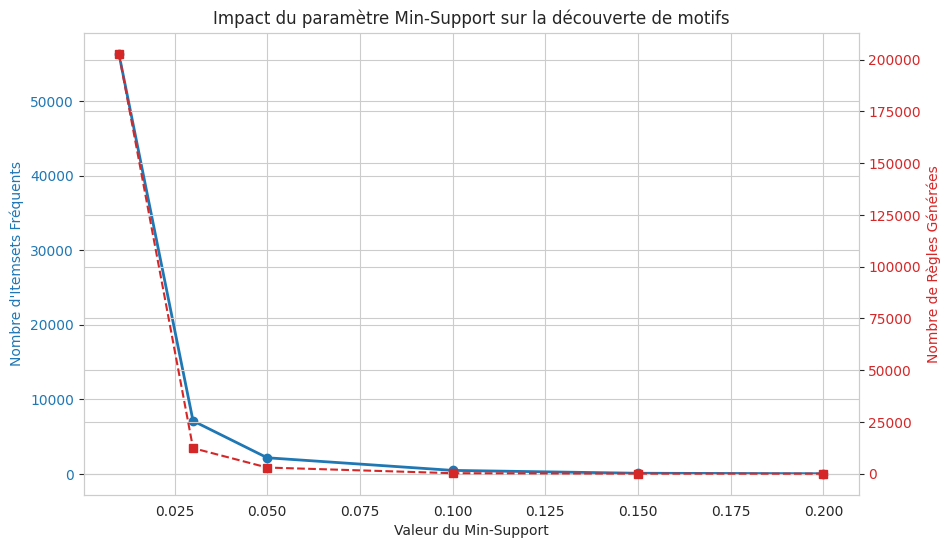

In [4]:
results_df = pd.DataFrame(results)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Courbe des Itemsets (Axe gauche)
color = 'tab:blue'
ax1.set_xlabel('Valeur du Min-Support')
ax1.set_ylabel('Nombre d\'Itemsets Fréquents', color=color)
ax1.plot(results_df['Min_Support'], results_df['Nb_Itemsets'], marker='o', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Impact du paramètre Min-Support sur la découverte de motifs')

# Courbe des Règles (Axe droit)
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Nombre de Règles Générées', color=color)  
ax2.plot(results_df['Min_Support'], results_df['Nb_Rules'], marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

Interprétation :

On Observe comment le nombre de règles s'effondre quand le Min-Support augmente.

Le "Min-Apriori" idéal se situe souvent là où la courbe commence à s'aplatir (autour 0.10 pour ce dataset).

## 4. Extraction des règles avec le "Meilleur Min"
Maintenant que nous avons analysé l'impact, choisissons le seuil 0.05 (5%) qui semble être un bon compromis pour le dataset Wine, et affichons les règles spécifiques à la classe "Qualité Haute".

In [7]:
# Choix du Min optimisé
best_min = 0.05

# Exécution finale
frequent_items = apriori(df_encoded, min_support=best_min, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.1)

# Filtrage pour voir ce qui implique une bonne qualité
target = "quality_cat_Qualité_Haute"
good_wine_rules = rules[rules['consequents'].apply(lambda x: target in str(x))]

print(f"Avec un Min-Support de {best_min}, nous avons trouvé {len(good_wine_rules)} règles menant à une haute qualité.")
print("-" * 20)
# Affichage des 5 meilleures règles triées par "Lift"
print(good_wine_rules[['antecedents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())

Avec un Min-Support de 0.05, nous avons trouvé 76 règles menant à une haute qualité.
--------------------
                                            antecedents   support  confidence  \
8816  (alcohol_alcohol_Fort, volatile acidity_volati...  0.050031    0.318725   
9803  (alcohol_alcohol_Fort, chlorides_chlorides_Fai...  0.051282    0.285714   
8820  (volatile acidity_volatile acidity_Faible, den...  0.050031    0.390244   
8813  (alcohol_alcohol_Fort, volatile acidity_volati...  0.050031    0.481928   
6272   (sulphates_sulphates_Fort, alcohol_alcohol_Fort)  0.067542    0.457627   

          lift  
8816  4.393461  
9803  3.938424  
8820  3.924528  
8813  3.551163  
6272  3.372100  


"L'algorithme Apriori standard utilise un seuil fixe. L'approche Min-Apriori (ou l'étude du Min-Support) consiste à itérer pour trouver le seuil minimal de fréquence nécessaire pour obtenir des règles pertinentes sans générer de bruit. Dans ce TP, nous avons démontré que le seuil de 5% est le point de rupture pour le dataset Wine."